In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA

In [ ]:
#Code to print the metadata of the raw data 
def print_meta_data(input_data_frame):  
  print("Dataframe Head \n" + str(input_data_frame.head()) +"\n")
  print("Dataframe Tail \n " + str(input_data_frame.tail()) + "\n")
  print("Dataframe Shape") 
  print(input_data_frame.shape,end = "\n\n")
  print("Dataframe Info")
  print(input_data_frame.info(),end="\n\n")
  print("Dataframe description")
  print(input_data_frame.describe(),end="\n\n")
  #Print the sum of Null values if any 
  print("Total Null Values " + str(input_data_frame.isna().sum()) + "\n")
  #Print no of duplicate rows 
  print("Duplicate Data : " ,end=" ")
  print(input_data_frame.duplicated().sum(),end="\n")

In [ ]:
data_frame = pd.read_csv("https://personal.utdallas.edu/~pxn210006/tesla_stock_price.csv")
print_meta_data(data_frame)

Dataframe Head 
         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
1  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
3  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
4  2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500

Dataframe Tail 
             Date        Open        High         Low       Close   Adj Close  \
3072  2022-09-13  292.899994  297.399994  290.399994  292.130005  292.130005   
3073  2022-09-14  292.239990  306.000000  291.640015  302.609985  302.609985   
3074  2022-09-15  301.829987  309.119995  300.720001  303.750000  303.750000   
3075  2022-09-16  299.609985  303.709991  295.600006  303.350006  303.350006   
3076  2022-09-19  300.089996  309.839996  297.799988  309.070007  309.070007   

        Volume  
3072  682296

In [ ]:
# Save copy to use later
df = data_frame.copy(deep=True)

In [ ]:
# Code for pre-processing the dataset, which would include standardization, normalization, categorical to numerical, etc
def data_preprocessing(input_data_frame):  
  #split the date object into individual elements 
  date_split = input_data_frame ['Date'].str.split('-', expand=True)
  input_data_frame['Year'] = date_split[0].astype('int')
  input_data_frame['Month'] = date_split[1].astype('int')
  input_data_frame['Day'] = date_split[2].astype('int')
  input_data_frame.drop(['Date'], axis = 1,inplace=True)
  #drop the adjclose 
  #input_data_frame.drop(['Adj Close'], axis = 1,inplace=True)

  #add quarter 
  input_data_frame['Quarter'] = np.where(input_data_frame['Month']%3==0,1,0)
  
  #PCA works on float , so covert the datatype into float 
  input_data_frame = input_data_frame.astype(float)
  
  print("\nPre-processed Data frame\n")
  print(input_data_frame.info())

  features = ['Close', 'Open', 'High', 'Low','Year','Volume','Month','Day','Quarter']
  # Separating out the features
  scaled_dataframe = input_data_frame.loc[:, features].values
  # Separating out the target
  target_val = input_data_frame.loc[:,['Close']].values
  # Standardizing the features
  scaled_dataframe = StandardScaler().fit_transform(scaled_dataframe)

  return scaled_dataframe

In [ ]:
#data preprocessing 
processed_data = data_preprocessing(data_frame)


Pre-processed Data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3077 non-null   float64
 1   High       3077 non-null   float64
 2   Low        3077 non-null   float64
 3   Close      3077 non-null   float64
 4   Adj Close  3077 non-null   float64
 5   Volume     3077 non-null   float64
 6   Year       3077 non-null   float64
 7   Month      3077 non-null   float64
 8   Day        3077 non-null   float64
 9   Quarter    3077 non-null   float64
dtypes: float64(10)
memory usage: 240.5 KB
None


In [ ]:
def data_visualization(input_data_frame,processed_data):
  #print the histogram 
  print("\nFigure 01: Histogram")
  input_data_frame.hist(bins=50, figsize=(20,15))
  plt.show()#Code to print the metadata of the raw data


Figure 01: Histogram


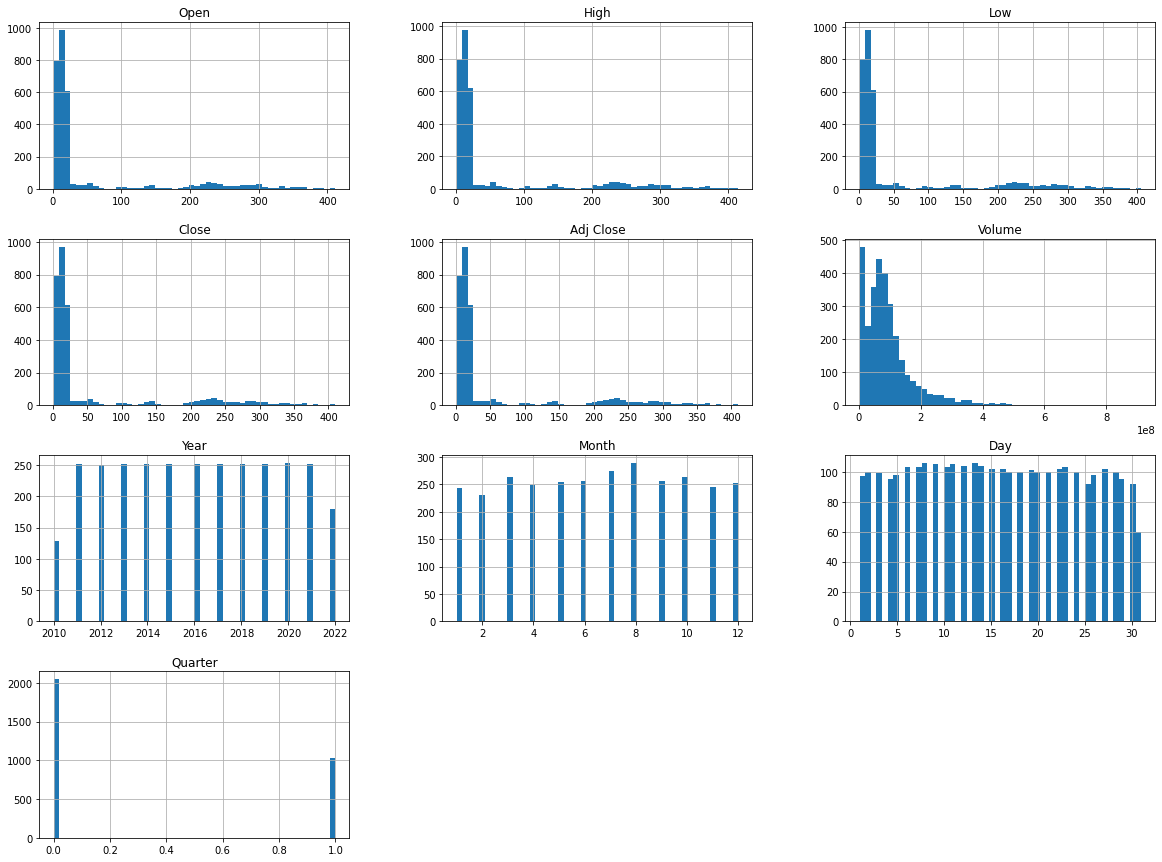

In [ ]:
#Data Visualization 
data_visualization(data_frame, processed_data)

In [ ]:
class LSTM:
  # Class which implements the LSTM Model
  def __init__(self, input_size, output_size, hidden_size, lstm_cells, learning_rate):
    # dimensions of input
    self.input_size = input_size
    # dimensions of output
    self.output_size = output_size
    # no of neurons in hidden layer
    self.hidden_size = hidden_size
    # no of lstm cells
    self.lstm_cells = lstm_cells
    # learning rate
    self.learning_rate = learning_rate
    
    # Forget Gate
    # initialize gate
    self.forget_gate = [np.zeros((hidden_size, 1)) for cell in range(lstm_cells)]
    # set random weights
    self.weights_forget_gate = np.random.random((hidden_size, input_size+hidden_size))/np.sqrt(input_size+hidden_size)
    # set random bias
    self.bias_forget_gate = np.random.random((hidden_size, 1))

    # Input Gate
    # initialize gate
    self.input_gate = [np.zeros((hidden_size, 1)) for cell in range(lstm_cells)]
    # set random weights
    self.weights_input_gate = np.random.random((hidden_size, input_size+hidden_size))/np.sqrt(input_size+hidden_size)
    # set random bias
    self.bias_input_gate = np.random.random((hidden_size, 1))

    # Output Gate
    # initialize gate
    self.output_gate = [np.zeros((hidden_size, 1)) for cell in range(lstm_cells)]
    # set random weights
    self.weights_output_gate = np.random.random((hidden_size, input_size+hidden_size))/np.sqrt(input_size+hidden_size)
    # set random bias
    self.bias_output_gate = np.random.random((hidden_size, 1))

    # Candidate Gate
    # initialize gate
    self.candidate_gate = [np.zeros((hidden_size, 1)) for cell in range(lstm_cells)]
    # set random weights
    self.weights_candidate_gate = np.random.random((hidden_size, input_size+hidden_size))/np.sqrt(input_size+hidden_size)
    # set random bias
    self.bias_candidate_gate = np.random.random((hidden_size, 1))

    # Hidden Gate
    self.hidden_gate = [np.zeros((hidden_size, 1)) for cell in range(lstm_cells)]

    # Cell State
    self.cell_state = [np.zeros((hidden_size, 1)) for cell in range(lstm_cells)]

    # Final Output weight and bias
    self.weight_final = np.random.random((output_size, hidden_size))
    self.bias_final = np.random.random((output_size, 1))

  # Activation functions and their derivatives
  # sigmoid
  def sigmoid_activation(self, X):
    return 1/(1+np.exp(-X))
  
  # derivative of sigmoid
  def sigmoid_derivative(self, X):
    return self.sigmoid_activation(X) * (1-self.sigmoid_activation(X))

  # tanh
  def tanh_activation(self, X):
    return np.tanh(X)

  # derivative of tanh
  def tanh_derivative(self, X):
    return 1-(X**2)

  # LSTM Forward Pass
  def forward_pass(self, X):
    # create array for storing x
    self.X = np.array(X)

    for i in range(1, self.lstm_cells):
      # update value in forget gate
      forget_gate_output = self.sigmoid_activation(np.dot(self.weights_forget_gate, np.vstack((self.hidden_gate[i-1], self.X[i]))) + self.bias_forget_gate)
      self.forget_gate[i] = forget_gate_output

      # update value in input gate
      input_gate_output = self.sigmoid_activation(np.dot(self.weights_input_gate, np.vstack((self.hidden_gate[i-1], self.X[i]))) + self.bias_input_gate)
      self.input_gate[i] = input_gate_output

      # update value in candidate gate
      candidate_gate_output = self.tanh_activation(np.dot(self.weights_candidate_gate, np.vstack((self.hidden_gate[i-1], self.X[i]))) + self.bias_candidate_gate)
      self.candidate_gate[i] = candidate_gate_output

      # update the cell state
      cell_state_output = forget_gate_output*self.cell_state[i-1] + input_gate_output*candidate_gate_output
      self.cell_state[i] = cell_state_output

      # update value of output gate
      output_gate_out = self.sigmoid_activation(np.dot(self.weights_output_gate, np.vstack((self.hidden_gate[i-1], self.X[i]))) + self.bias_output_gate)
      self.output_gate[i] = output_gate_out

      # update hidden state
      self.hidden_gate[i] = output_gate_out*self.tanh_activation(cell_state_output)
    
    prediction_Y = np.dot(self.weight_final, self.hidden_gate[-1]) + self.bias_final
    return prediction_Y
  
  # LSTM Backward pass
  def backward_pass(self, Y, prediction_Y):
    # Forget Gate
    # to store delta values
    delta_forget_gate = [np.zeros((self.hidden_size, 1)) for cell in range(self.lstm_cells+1)]
    # arrays to store derivate of weights
    der_weight_forget_gate = np.zeros_like(self.weights_forget_gate)
    # arrays to store bias
    der_bias_forget_gate = np.zeros_like(self.bias_forget_gate)

    # Input Gate
    # to store delta values
    delta_input_gate = [np.zeros((self.hidden_size, 1)) for cell in range(self.lstm_cells+1)]
    # arrays to store derivate
    der_weight_input_gate = np.zeros_like(self.weights_input_gate)
    # arrays to store bias
    der_bias_input_gate = np.zeros_like(self.bias_input_gate)

    # Cell State delta values
    delta_cell_state = [np.zeros((self.hidden_size, 1)) for cell in range(self.lstm_cells+1)]

    # Candidate Gate
    # to store delta values
    delta_candidate_gate = [np.zeros((self.hidden_size, 1)) for cell in range(self.lstm_cells+1)]
    # arrays to store derivate
    der_weight_candidate_gate = np.zeros_like(self.weights_candidate_gate)
    # arrays to store bias
    der_bias_candidate_gate = np.zeros_like(self.bias_candidate_gate)

    # Output Gate
    # to store delta values
    delta_output_gate = [np.zeros((self.hidden_size, 1)) for cell in range(self.lstm_cells+1)]
    # arrays to store derivate
    der_weight_output_gate = np.zeros_like(self.weights_output_gate)
    # arrays to store bias
    der_bias_output_gate = np.zeros_like(self.bias_output_gate)

    # Hidden Gate delta values
    delta_hidden_gate = [np.zeros((self.hidden_size, 1)) for cell in range(self.lstm_cells+1)]

    # Array to store derivate of final w0
    der_weights_final = np.zeros_like(self.weight_final)
    # Array to store final bias w0
    der_bias_final = np.zeros_like(self.bias_final)

    # Calculate error
    delta_evaluate = Y - prediction_Y
    # Compute derivarives of final weights
    der_weights_final = delta_evaluate * self.hidden_gate[-1].T
    # Compute derivative of final bias
    der_bias_final = delta_evaluate

    for i in reversed(range(self.lstm_cells)):
      z = np.vstack((self.hidden_gate[i-1], self.X[i]))

      # Calculate gradient for hidden gate
      delta_hidden_gate[i] = np.dot(self.weight_final.T, delta_evaluate) + delta_hidden_gate[i+1]

      # Calcluate gradient for output gate
      gradient_output_gate = self.tanh_activation(self.cell_state[i]) * delta_hidden_gate[i] * self.sigmoid_derivative(self.hidden_gate[i])
      delta_output_gate[i] = gradient_output_gate
      # Adding all weights of output deltas
      der_weight_output_gate += np.dot(gradient_output_gate, z.T)
      # Adding all w0 values of output deltas
      der_bias_output_gate += gradient_output_gate

      # Calculate gradient for cell state
      delta_cell_state[i] = self.output_gate[i] * delta_hidden_gate[i] * self.tanh_derivative(self.cell_state[i]) + delta_cell_state[i+1]

      # Calculate gradient for forget gate
      gradient_forget_gate = self.cell_state[i-1] * delta_cell_state[i] * self.sigmoid_derivative(self.forget_gate[i])
      delta_forget_gate[i] = gradient_forget_gate
      # Adding all weights of forget deltas
      der_weight_forget_gate += np.dot(gradient_forget_gate, z.T)
      # Adding all w0 values of forget deltas
      der_bias_forget_gate += gradient_forget_gate

      # Calculate gradient for input gate
      gradient_input_gate = self.candidate_gate[i] * delta_cell_state[i] * self.sigmoid_derivative(self.input_gate[i])
      delta_input_gate[i] = gradient_input_gate
      # Adding all weights of input deltas
      der_weight_input_gate += np.dot(gradient_input_gate, z.T)
      # Adding all w0 values of input deltas
      der_bias_input_gate += gradient_input_gate

      # Calculating gradient for candidate gate
      gradient_candidate_gate = self.input_gate[i] * delta_cell_state[i] * self.tanh_derivative(self.candidate_gate[i])
      delta_candidate_gate[i] = gradient_candidate_gate
      # Adding all weights of candidate deltas
      der_weight_candidate_gate += np.dot(delta_cell_state[i], z.T)
      # Adding all w0 values of candidate deltas
      der_bias_candidate_gate += delta_cell_state[i]

    return der_weights_final, der_bias_final, der_weight_forget_gate/self.lstm_cells, der_bias_forget_gate/self.lstm_cells, der_weight_input_gate/self.lstm_cells, der_bias_input_gate/self.lstm_cells, der_weight_output_gate/self.lstm_cells, der_bias_output_gate/self.lstm_cells, der_weight_candidate_gate/self.lstm_cells, der_bias_candidate_gate/self.lstm_cells

  # Training the model
  def model_fit(self, epochs, X, Y, X_val=None, Y_val=None):
    
    # Lists to store train and validation loss
    self.train_loss, self.validation_loss = [], []

    for i in range(epochs):
      # Train Loss per epoch
      train_loss_val = 0
      # Validation loss per epoch
      validation_loss_val = 0

      for j in range(len(X)):
        # Calculate predicted/next y
        prediction_Y = self.forward_pass(X[j])

        # Backward pass using error
        der_weights_final, der_bias_final, der_weight_forget_gate, der_bias_forget_gate, der_weight_input_gate, der_bias_input_gate, der_weight_output_gate, der_bias_output_gate, der_weight_candidate_gate, der_bias_candidate_gate = self.backward_pass(Y[j], prediction_Y)
        
        # Update weights of all gates
        self.weights_forget_gate = self.weights_forget_gate + self.learning_rate * der_weight_forget_gate
        self.weights_input_gate = self.weights_input_gate + self.learning_rate * der_weight_input_gate
        self.weights_candidate_gate = self.weights_candidate_gate + self.learning_rate * der_weight_candidate_gate
        self.weights_output_gate = self.weights_output_gate + self.learning_rate * der_weight_output_gate

        # Update w0 of lstm cells
        self.bias_forget_gate = self.bias_forget_gate + self.learning_rate * der_bias_forget_gate
        self.bias_input_gate = self.bias_input_gate + self.learning_rate * der_bias_input_gate
        self.bias_candidate_gate = self.bias_candidate_gate + self.learning_rate * der_bias_candidate_gate
        self.bias_output_gate = self.bias_output_gate + self.learning_rate * der_bias_output_gate

        # Update final weights of lstm cells
        self.weight_final = self.weight_final + self.learning_rate * der_weights_final
        self.bias_final = self.bias_final + self.learning_rate * der_bias_final

        train_loss_val += ((Y[j] - prediction_Y)**2)/2
    
      self.train_loss.append(train_loss_val)

      # Check: Is model overfitting?
      if X_val is not None and Y_val is not None:
        # calling the predict() function
        predicted_y_val = self.predict(X_val)
        # applying the reshape on the predicted_y
        predicted_y_val = predicted_y_val.reshape((predicted_y_val.shape[0], 1))
        # applying the reshape on train data Y
        train_y_val = Y_val.reshape((Y_val.shape[0], 1))

        # calculating validation loss for every iteration
        valid_loss = np.sum((train_y_val - predicted_y_val)**2, axis = 0)/2
        # appending validation loss
        self.validation_loss.append(valid_loss)
    
      print("Epoch {}/{} => Training Loss: {}".format(str(i+1), epochs, train_loss_val))
  
  # Performing predictions
  def predict(self, X):
    # Initialize list
    prediction_list = []
    l = len(X)
    for i in range(l):
      prediction_list.append(self.forward_pass(X[i]))
    return np.concatenate(prediction_list)

In [ ]:
# Preparing data for the model
# Here we are doing univariate time series prediction, thus using only one feature
# We will be doing prediction based on closing price of stock
df = df[['Date', 'Close']]
df

,Date,Close
0,2010-06-30,1.588667
1,2010-07-01,1.464000
2,2010-07-02,1.280000
3,2010-07-06,1.074000
4,2010-07-07,1.053333
...,...,...
3072,2022-09-13,292.130005
3073,2022-09-14,302.609985
3074,2022-09-15,303.750000
3075,2022-09-16,303.350006


In [ ]:
import datetime
# To convert date into a datetime object
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2010-06-30
1      2010-07-01
2      2010-07-02
3      2010-07-06
4      2010-07-07
          ...    
3072   2022-09-13
3073   2022-09-14
3074   2022-09-15
3075   2022-09-16
3076   2022-09-19
Name: Date, Length: 3077, dtype: datetime64[ns]

In [ ]:
# We will use date as index to anlyse how stock closing value changes over time period
df.index = df.pop('Date')
df

,Close
Date,
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
2010-07-07,1.053333
...,...
2022-09-13,292.130005
2022-09-14,302.609985
2022-09-15,303.750000


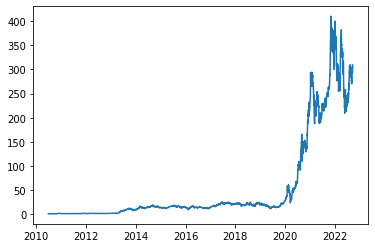

In [ ]:
# Plot stock closing price
plt.plot(df.index, df['Close'])

In [ ]:
# We will convert our problem to supervised learning
# This function converts dataset to a new one where previous n target values are used to predict the current target
# Thus we are using previous three closing stock price values as feature to output current price
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Here we are not using entire dataset but part from year 2020
# This is because lstm doesn't extrapolate well and stock price increased rapidly from 2020
# Thus performing prediction from year 2020 will give better results
windowed_df = df_to_windowed_df(df, '2020-04-06', '2022-09-19', n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2020-04-06,32.104000,30.298000,32.000668,34.416000
1,2020-04-07,30.298000,32.000668,34.416000,36.363335
2,2020-04-08,32.000668,34.416000,36.363335,36.589333
3,2020-04-09,34.416000,36.363335,36.589333,38.200001
4,2020-04-13,36.363335,36.589333,38.200001,43.396667
...,...,...,...,...,...
614,2022-09-13,289.260010,299.679993,304.420013,292.130005
615,2022-09-14,299.679993,304.420013,292.130005,302.609985
616,2022-09-15,304.420013,292.130005,302.609985,303.750000
617,2022-09-16,292.130005,302.609985,303.750000,303.350006


In [ ]:
# Convert dataframe to numpy array to pass it to LSTM model
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  scaler = MinMaxScaler(feature_range=(0,1))

  middle_matrix = scaler.fit_transform(df_as_np[:, 1:-1])
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = scaler.fit_transform(df_as_np[:, -1].reshape(-1, 1))

  return dates, X, Y

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((619,), (619, 3, 1), (619, 1))

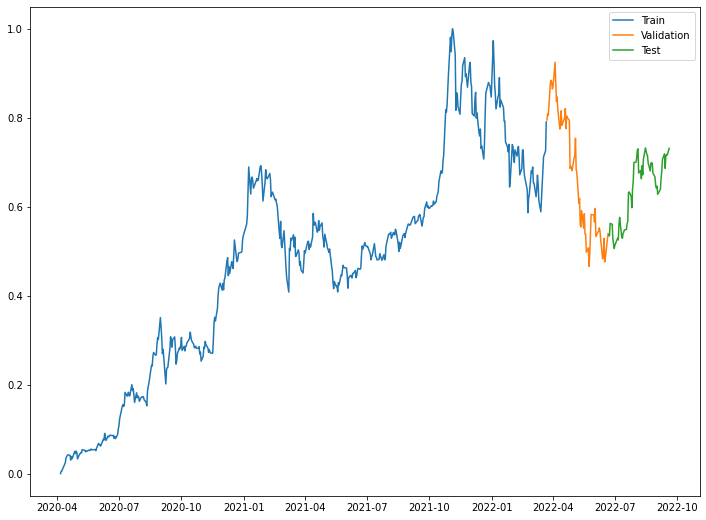

In [ ]:
# Split dataset into training, validation and test datasets
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Plotting all three datasets
plt.figure(figsize=(12, 9))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
# We will create six models by changing various hyperparameters

# epochs = 200, learning_rate = 0.01, Hiddel Layer Neurons = 15
model1 = LSTM(input_size=1, output_size=1, hidden_size=15, lstm_cells=3, learning_rate=0.01)
model1.model_fit(epochs=200, X=X_train, Y=y_train, X_val=X_val, Y_val=y_val)

# epochs = 300, learning_rate = 0.01, Hidden Layer Neurons = 15
model2 = LSTM(input_size=1, output_size=1, hidden_size=15, lstm_cells=3, learning_rate=0.01)
model2.model_fit(epochs=300, X=X_train, Y=y_train, X_val=X_val, Y_val=y_val)

# epochs = 200, learning_rate = 0.1, Hidden Layer Neurons = 15
model3 = LSTM(input_size=1, output_size=1, hidden_size=15, lstm_cells=3, learning_rate=0.1)
model3.model_fit(epochs=200, X=X_train, Y=y_train, X_val=X_val, Y_val=y_val)

# epochs = 300, learning_rate = 0.1, Hidden Layer Neurons = 15
model4 = LSTM(input_size=1, output_size=1, hidden_size=20, lstm_cells=3, learning_rate=0.1)
model4.model_fit(epochs=300, X=X_train, Y=y_train, X_val=X_val, Y_val=y_val)

# epochs = 200, learning_rate = 0.01, Hidden Layer Neurons = 10
model5 = LSTM(input_size=1, output_size=1, hidden_size=10, lstm_cells=3, learning_rate=0.01)
model5.model_fit(epochs=200, X=X_train, Y=y_train, X_val=X_val, Y_val=y_val)

# epochs = 300, learning_rate = 0.01, Hidden Layer Neurons = 10
model6 = LSTM(input_size=1, output_size=1, hidden_size=10, lstm_cells=3, learning_rate=0.01)
model6.model_fit(epochs=300, X=X_train, Y=y_train, X_val=X_val, Y_val=y_val)

Epoch 1/200 => Training Loss: [[41.25053142]]
Epoch 2/200 => Training Loss: [[0.78513114]]
Epoch 3/200 => Training Loss: [[0.63992623]]
Epoch 4/200 => Training Loss: [[0.53156667]]
Epoch 5/200 => Training Loss: [[0.45076361]]
Epoch 6/200 => Training Loss: [[0.3905056]]
Epoch 7/200 => Training Loss: [[0.34552719]]
Epoch 8/200 => Training Loss: [[0.31189298]]
Epoch 9/200 => Training Loss: [[0.28667389]]
Epoch 10/200 => Training Loss: [[0.26769723]]
Epoch 11/200 => Training Loss: [[0.25335542]]
Epoch 12/200 => Training Loss: [[0.24246095]]
Epoch 13/200 => Training Loss: [[0.23413728]]
Epoch 14/200 => Training Loss: [[0.2277373]]
Epoch 15/200 => Training Loss: [[0.22278279]]
Epoch 16/200 => Training Loss: [[0.2189197]]
Epoch 17/200 => Training Loss: [[0.21588519]]
Epoch 18/200 => Training Loss: [[0.21348346]]
Epoch 19/200 => Training Loss: [[0.21156808]]
Epoch 20/200 => Training Loss: [[0.21002896]]
Epoch 21/200 => Training Loss: [[0.2087829]]
Epoch 22/200 => Training Loss: [[0.20776666]]


In [ ]:
# Now we will do training, validation and test predictions for all the models
model1_train_predictions = model1.predict(X_train).flatten()
model1_validation_predictions = model1.predict(X_val).flatten()
model1_test_predictions = model1.predict(X_test).flatten()

model2_train_predictions = model2.predict(X_train).flatten()
model2_validation_predictions = model2.predict(X_val).flatten()
model2_test_predictions = model2.predict(X_test).flatten()

model3_train_predictions = model3.predict(X_train).flatten()
model3_validation_predictions = model3.predict(X_val).flatten()
model3_test_predictions = model3.predict(X_test).flatten()

model4_train_predictions = model4.predict(X_train).flatten()
model4_validation_predictions = model4.predict(X_val).flatten()
model4_test_predictions = model4.predict(X_test).flatten()

model5_train_predictions = model5.predict(X_train).flatten()
model5_validation_predictions = model5.predict(X_val).flatten()
model5_test_predictions = model5.predict(X_test).flatten()

model6_train_predictions = model6.predict(X_train).flatten()
model6_validation_predictions = model6.predict(X_val).flatten()
model6_test_predictions = model6.predict(X_test).flatten()

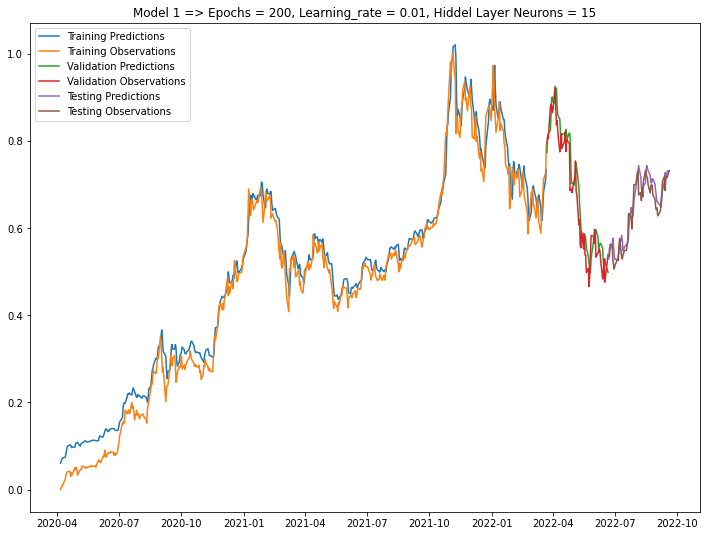

In [ ]:
# Plot Predctions vs Observations for all the models

# epochs = 200, learning_rate = 0.01, Hiddel Layer Neurons = 15
plt.figure(figsize=(12, 9))
plt.plot(dates_train, model1_train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, model1_validation_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, model1_test_predictions)
plt.plot(dates_test, y_test)
plt.title('Model 1 => Epochs = 200, Learning_rate = 0.01, Hiddel Layer Neurons = 15')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

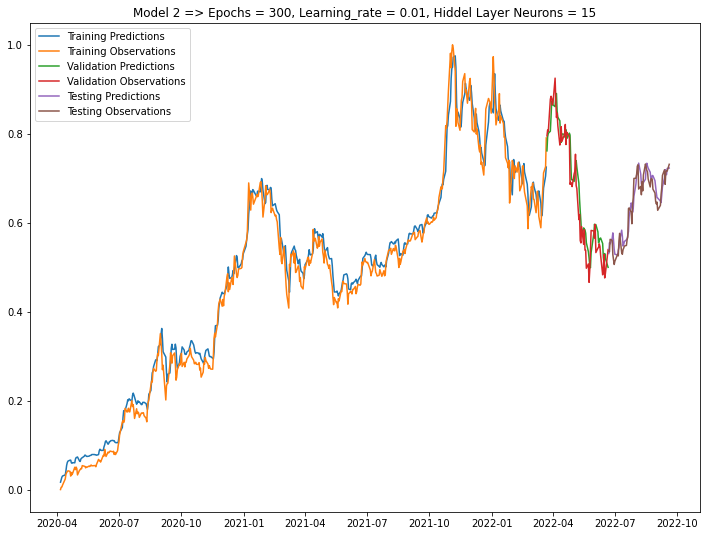

In [ ]:
# epochs = 300, learning_rate = 0.01, Hiddel Layer Neurons = 15
plt.figure(figsize=(12, 9))
plt.plot(dates_train, model2_train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, model2_validation_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, model2_test_predictions)
plt.plot(dates_test, y_test)
plt.title('Model 2 => Epochs = 300, Learning_rate = 0.01, Hiddel Layer Neurons = 15')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

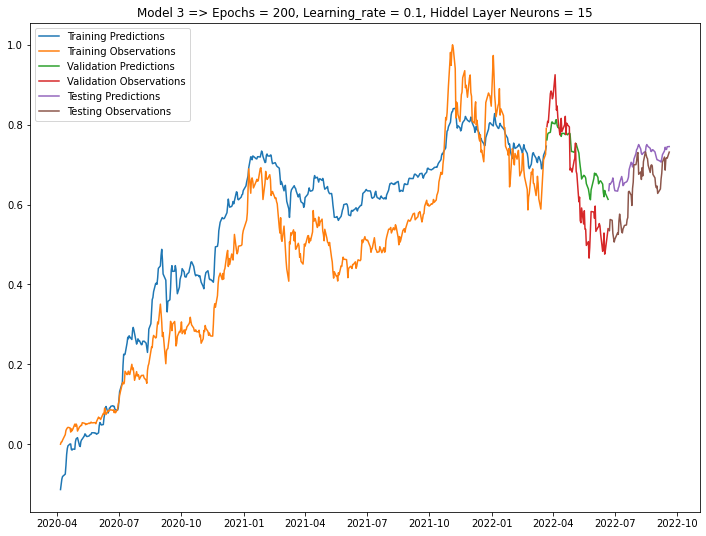

In [ ]:
# epochs = 200, learning_rate = 0.1, Hiddel Layer Neurons = 15
plt.figure(figsize=(12, 9))
plt.plot(dates_train, model3_train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, model3_validation_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, model3_test_predictions)
plt.plot(dates_test, y_test)
plt.title('Model 3 => Epochs = 200, Learning_rate = 0.1, Hiddel Layer Neurons = 15')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

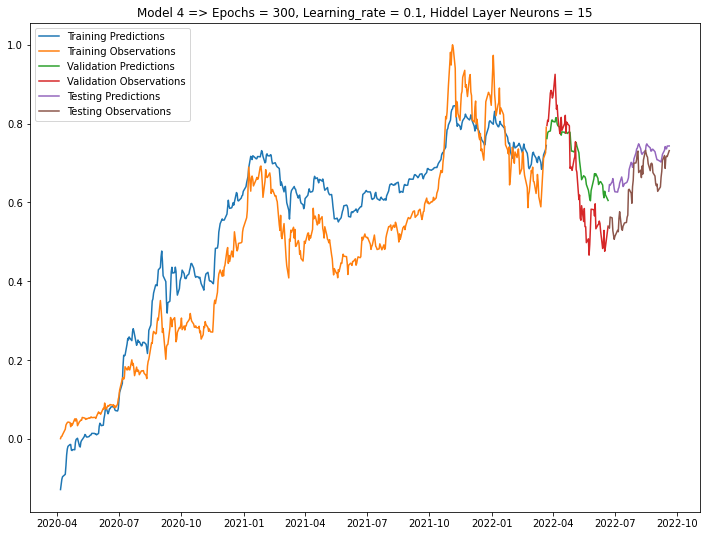

In [ ]:
# epochs = 300, learning_rate = 0.1, Hiddel Layer Neurons = 15
plt.figure(figsize=(12, 9))
plt.plot(dates_train, model4_train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, model4_validation_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, model4_test_predictions)
plt.plot(dates_test, y_test)
plt.title('Model 4 => Epochs = 300, Learning_rate = 0.1, Hiddel Layer Neurons = 15')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

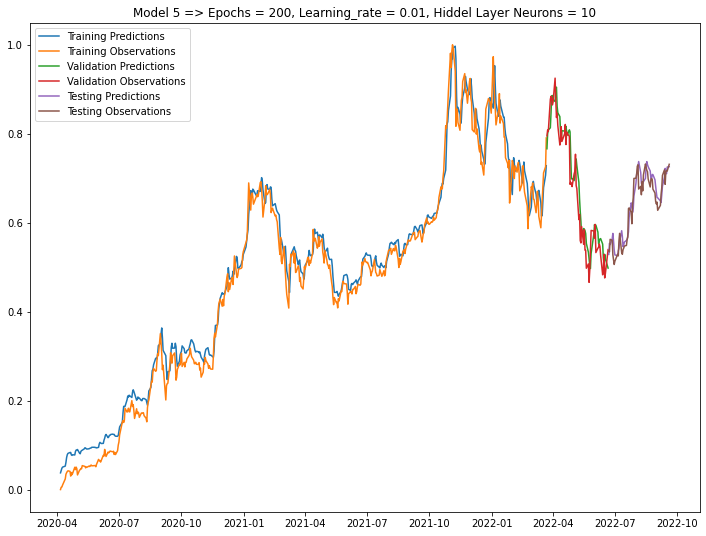

In [ ]:
# epochs = 200, learning_rate = 0.01, Hiddel Layer Neurons = 10
plt.figure(figsize=(12, 9))
plt.plot(dates_train, model5_train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, model5_validation_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, model5_test_predictions)
plt.plot(dates_test, y_test)
plt.title('Model 5 => Epochs = 200, Learning_rate = 0.01, Hiddel Layer Neurons = 10')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

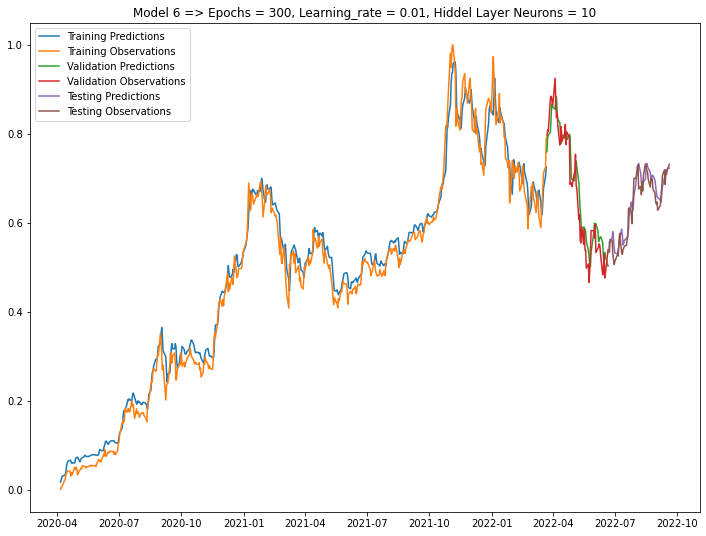

In [ ]:
# epochs = 300, learning_rate = 0.01, Hiddel Layer Neurons = 10
plt.figure(figsize=(12, 9))
plt.plot(dates_train, model6_train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, model6_validation_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, model6_test_predictions)
plt.plot(dates_test, y_test)
plt.title('Model 6 => Epochs = 300, Learning_rate = 0.01, Hiddel Layer Neurons = 10')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
# Calulating the root mean squared and mean absolute error for all models

model1_rmse_val = np.sqrt(mse(y_test, model1_test_predictions))
model1_mape_val = mape(y_test, model1_test_predictions)
print("Root Mean Squared Error for Model1 => {}".format(str(model1_rmse_val)))
print("Mean Absolute Percentage Error for Model1 => {}\n".format(str(model1_mape_val)))

model2_rmse_val = np.sqrt(mse(y_test, model2_test_predictions))
model2_mape_val = mape(y_test, model2_test_predictions)
print("Root Mean Squared Error for Model2 => {}".format(str(model2_rmse_val)))
print("Mean Absolute Percentage Error for Model2 => {}\n".format(str(model2_mape_val)))

model3_rmse_val = np.sqrt(mse(y_test, model3_test_predictions))
model3_mape_val = mape(y_test, model3_test_predictions)
print("Root Mean Squared Error for Model3 => {}".format(str(model3_rmse_val)))
print("Mean Absolute Percentage Error for Model3 => {}\n".format(str(model3_mape_val)))

model4_rmse_val = np.sqrt(mse(y_test, model4_test_predictions))
model4_mape_val = mape(y_test, model4_test_predictions)
print("Root Mean Squared Error for Model4 => {}".format(str(model4_rmse_val)))
print("Mean Absolute Percentage Error for Model4 => {}\n".format(str(model4_mape_val)))

model5_rmse_val = np.sqrt(mse(y_test, model5_test_predictions))
model5_mape_val = mape(y_test, model5_test_predictions)
print("Root Mean Squared Error for Model5 => {}".format(str(model5_rmse_val)))
print("Mean Absolute Percentage Error for Model5 => {}\n".format(str(model5_mape_val)))

model6_rmse_val = np.sqrt(mse(y_test, model6_test_predictions))
model6_mape_val = mape(y_test, model6_test_predictions)
print("Root Mean Squared Error for Model6 => {}".format(str(model6_rmse_val)))
print("Mean Absolute Percentage Error for Model6 => {}\n".format(str(model6_mape_val)))

Root Mean Squared Error for Model1 => 0.02567147296083029
Mean Absolute Percentage Error for Model1 => 0.032987103377250804

Root Mean Squared Error for Model2 => 0.024061143707843863
Mean Absolute Percentage Error for Model2 => 0.0313583982568547

Root Mean Squared Error for Model3 => 0.07579732173729978
Mean Absolute Percentage Error for Model3 => 0.11115301216068767

Root Mean Squared Error for Model4 => 0.07127028952272818
Mean Absolute Percentage Error for Model4 => 0.1040354160181966

Root Mean Squared Error for Model5 => 0.02441319928256337
Mean Absolute Percentage Error for Model5 => 0.03147180886355422

Root Mean Squared Error for Model6 => 0.024594663979826605
Mean Absolute Percentage Error for Model6 => 0.032264009793367354



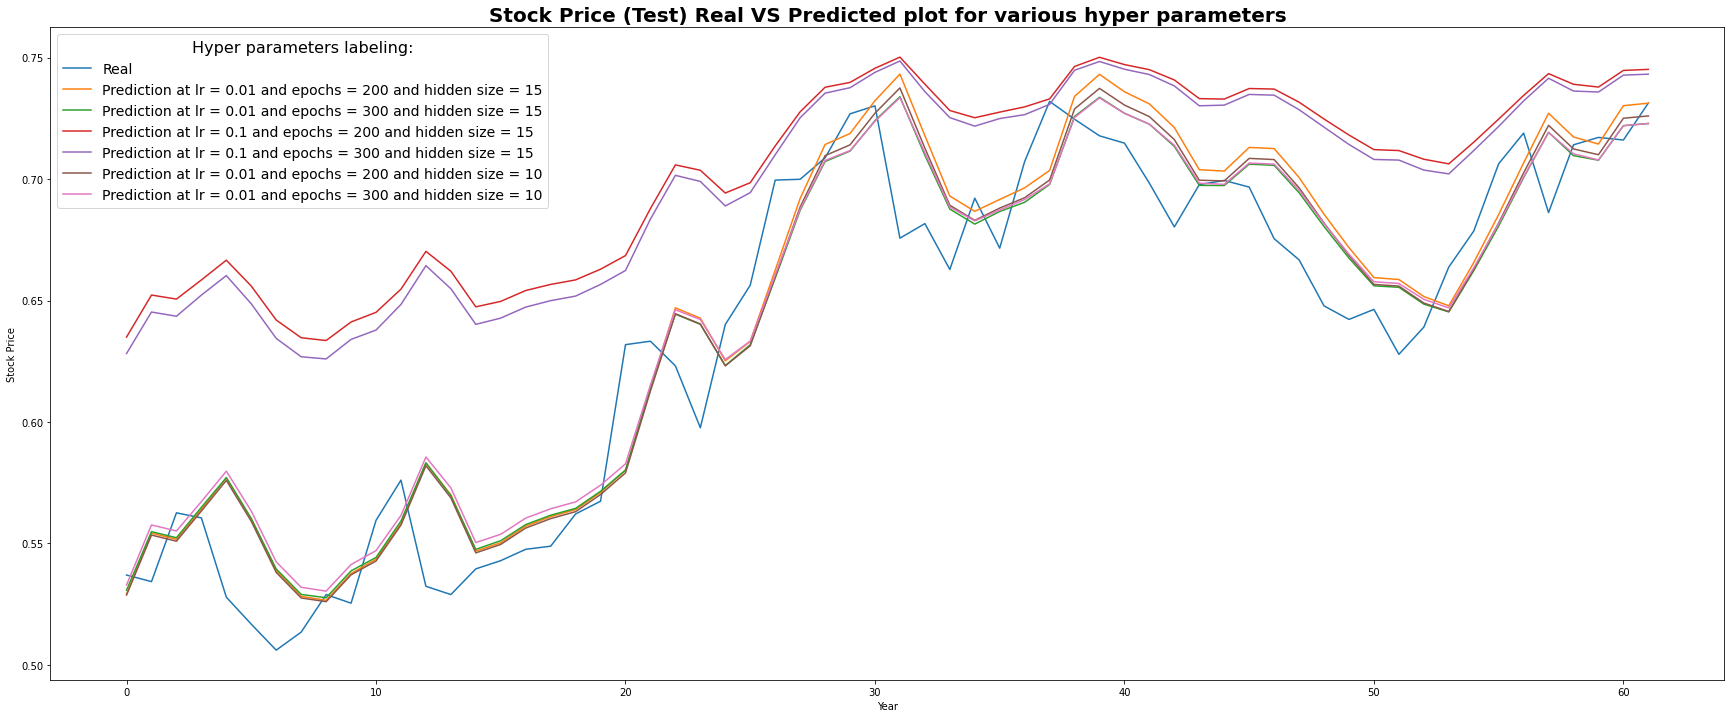

In [ ]:
# Plotting Prediction vs Observations of test dataset for all models
plt.figure(figsize=(30, 12))

plt.plot(y_test, label='Real')

plt.plot(model1_test_predictions, label='Prediction at lr = 0.01 and epochs = 200 and hidden size = 15')
plt.plot(model2_test_predictions, label='Prediction at lr = 0.01 and epochs = 300 and hidden size = 15')
plt.plot(model3_test_predictions, label='Prediction at lr = 0.1 and epochs = 200 and hidden size = 15')
plt.plot(model4_test_predictions, label='Prediction at lr = 0.1 and epochs = 300 and hidden size = 15')
plt.plot(model5_test_predictions, label='Prediction at lr = 0.01 and epochs = 200 and hidden size = 10')
plt.plot(model6_test_predictions, label='Prediction at lr = 0.01 and epochs = 300 and hidden size = 10')

plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Stock Price (Test) Real VS Predicted plot for various hyper parameters', fontweight='bold', size=20)
plt.legend(title="Hyper parameters labeling:", fontsize=14, title_fontsize=16)
plt.show()